In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV #심화
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

# 784 = 28*28

(70000, 784)

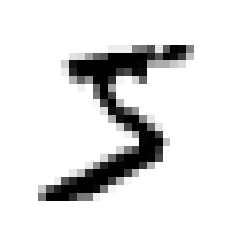

In [5]:
digit = X[0]
digit = digit.reshape(28, 28)
plt.imshow(digit, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [6]:
y[0]

'5'

In [7]:
y = y.astype(np.uint8)

In [8]:
# X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, X_test, y_train, y_test = X[:2000], X[10000:10400], y[:2000], y[10000:10400]

## Q1. 배웠던 분류 방법 중 하나로 모델을 만들고 train/test셋 정확도 구해보기
### KNN, Logistic Regression, Tree

In [9]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X)

y_train_pred = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

cv_score = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
print(f"교차 검증 평균 점수: {cv_score.mean():.2f}")

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, y_train_pred),3))

print('Test Data')
print('정확도: ', round(accuracy_score(y_test, y_test_pred_knn),3))

교차 검증 평균 점수: 0.89
Train Data
정확도:  0.935
Test Data
정확도:  0.922


In [10]:
logistic = LogisticRegression(n_jobs = -1)
logistic.fit(X_train, y_train)

print('Train Data')
print('정확도:', round(logistic.score(X_train, y_train),3))

y_test_pred_logistic = logistic.predict(X_test)

print('Test Data')
print('정확도: ', round(accuracy_score(y_test, y_test_pred_logistic),3))

Train Data
정확도: 1.0
Test Data
정확도:  0.87


In [11]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, y_train_pred_tree),3))

print('Test Data')
print('정확도: ', round(accuracy_score(y_test, y_test_pred_tree),3))

Train Data
정확도:  1.0
Test Data
정확도:  0.702


## Q2. 배웠던 앙상블 방법 중 하나로 모델을 만들고 train/test셋 정확도 구해보기 (1번 보다 정확도 높게)
### Random Forest, Bagging, Boosting
앙상블 방법의 정확도가 높게 나왔다면, 왜 높게 나왔는지 간단하게 서술

In [12]:
randomforest = RandomForestClassifier(n_jobs = -1, random_state=42)
randomforest.fit(X_train, y_train)

y_train_pred_randomforest = randomforest.predict(X_train)
y_test_pred_randomforest = randomforest.predict(X_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, y_train_pred_randomforest),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, y_test_pred_randomforest),3))

Train Data
정확도:  1.0
Test Data
정확도:  0.905


In [17]:
bag_clf = BaggingClassifier(
    KNeighborsClassifier(n_neighbors=5), n_estimators=10,
    max_samples = 0.8 ,oob_score=True, bootstrap=True, random_state=42, n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_train_pred_bagging = bag_clf.predict(X_train)
y_test_pred_bagging = bag_clf.predict(X_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, y_train_pred_randomforest),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, y_test_pred_bagging),3))

/home/pirl/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:642: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


Train Data
정확도:  1.0
Test Data
정확도:  0.928


In [22]:
Ada = AdaBoostClassifier(base_estimator=knn,
                         n_estimators=10,
                         learning_rate=1.)
Ada.fit(X_train, y_train)

y_train_pred_Ada = Ada.predict(X_train)
y_test_pred_Ada = Ada.predict(X_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, y_train_pred_Ada),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, y_test_pred_Ada),3))

ValueError: KNeighborsClassifier doesn't support sample_weight.

In [23]:
print('knn 정확도: ', round(accuracy_score(y_test, y_test_pred_knn),3))
print('logistic 정확도: ', round(accuracy_score(y_test, y_test_pred_logistic),3))
print('tree 정확도: ', round(accuracy_score(y_test, y_test_pred_tree),3))
print('random forest 정확도: ', round(accuracy_score(y_test, y_test_pred_randomforest),3))
print('bagging with knn 정확도: ', round(accuracy_score(y_test, y_test_pred_bagging),3))
print('adaboost 정확도: ', round(accuracy_score(y_test, y_test_pred_Ada),3))

knn 정확도:  0.922
logistic 정확도:  0.87
tree 정확도:  0.702
random forest 정확도:  0.912
bagging with knn 정확도:  0.928
adaboost 정확도:  0.475


## (점수 미반영) Grid Search 사용해서 더 좋은 모델 만들어보기

### 특정한 정답은 없으며, 문제가 원하는 답변에 충족하면 만점 처리

In [22]:
?RandomForestClassifier

In [23]:
import time
start = time.time()  # 시작 시간 저장

param_grid = [
    {'n_estimators': [100,200,300,400,500], 
     'max_features': ['auto', 'log2'],
     'criterion' : ['gini', 'entropy']     
    },
  ]

randomforest_grid = RandomForestClassifier(random_state=42, n_jobs = -1)

grid_search = GridSearchCV(randomforest_grid, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print("time :", time.time() - start)  # 실행 시간 = 현재시각 - 시작시간 

time : 333.9161834716797


In [24]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 400}
RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)


In [15]:
randomforest = RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)
randomforest.fit(X_train, y_train)

y_train_pred_randomforest = randomforest.predict(X_train)
y_test_pred_randomforest = randomforest.predict(X_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, y_train_pred_randomforest),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, y_test_pred_randomforest),3))

Train Data
정확도:  1.0
Test Data
정확도:  0.912
